<a href="https://colab.research.google.com/github/1V1a1l8/1V1a1l8/blob/main/ProyectoIntegrador/Avance4_Equipo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Introduccion**

Este documento tiene como objetivo verificar la existencia de una relación (positiva o negativa) entre el estudio de la educación media superior en línea y los niveles de ansiedad social, enfocado en la comparación de estudiantes de medicina con y sin estudios medios superiores en línea. La ansiedad social es definida como el medio o la ansiedad intensa en una o más situaciones sociales en las que el sujeto está expuesto a una posible evaluación por parte de otros sujetos como lo puede ser una conversación, ser visto por otros o tener que realizar actividades frente a otros.

Se espera que los resultados encontrados sirvan para que los médicos puedan diseñar programas, políticas o mecanismos de acción para reducir los niveles de ansiedad social entre los estudiantes. La evidencia empírica muestra que esta condición puede tener impactos relevantes en la calidad de vida de los estudiantes, esto al interferir en las relaciones interpersonales y afectando el desempeño en el trabajo o actividades académicas.

Para cuantificar la relación entre la educación en línea y los niveles de ansiedad, se hace uso de información recopilada por encuestas realizadas por parte del equipo médico de la Universidad Autónoma de Nuevo León, y se hará uso de algoritmos no supervisados para generar agrupaciones (K-means y PCA), para posteriormente modelar econométricamente las relaciones entre la educación en línea y los niveles de ansiedad. Se busca encontrar características sociodemográficas relevantes y verificar si los estudiantes con educación media en línea de verdad tienen mayores niveles de ansiedad o no.

El documento tiene la siguiente composición: en el primer capítulo se hará una revisión de la literatura relacionada con la ansiedad social, así como de los indicadores existentes y que serán usados para todos los análisis para entender de manera integral el concepto. Adicionalmente, se revisará alguna evidencia empírica para tener mayor contexto.

En el segundo capítulo, se presentan las características de los individuos encuestados, procediendo primero a realizar las agrupaciones con los algoritmos no supervisados y después se realiza un análisis de naturaleza descriptiva para cada agrupación generada con base en sus diversas características.
En el capítulo tres, se estiman las elasticidades con base en el tipo de educación media superior realizada, en línea o no, y las distintas medidas de ansiedad. También, se explica la forma en la que se procede empíricamente para después interpretar y analizar los resultados obtenidos.
Finalmente, en el capítulo cuatro se presentan las conclusiones obtenidas del trabajo de investigación.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# ignorar warnings
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/ProyectoIntegrador/Avance_4/base_protocolo.xlsx')
df.head()

,Código,CI,Edad,Año,Línea,MA,SON,ES,PD,CRI,...,TBM,IEI,MPC,AHG,TMM,MDO,DIG,DVS,RBF,TOTAL BECK
0,1,1,21,5,2,1,0,0,0,1,...,0,0,0,0,2,0,0,0,0,10
1,2,1,25,5,2,0,0,1,1,2,...,0,1,0,0,0,0,1,0,0,10
2,3,1,19,1,1,3,4,4,4,4,...,1,3,0,1,1,2,3,1,2,41
3,4,1,18,1,1,2,2,2,2,1,...,0,0,1,1,2,0,0,0,0,9
4,5,1,19,2,1,1,0,2,2,1,...,3,2,1,0,0,0,2,0,0,26


In [ ]:
df.columns

Index(['Código', 'CI', 'Edad', 'Año', 'Línea', 'MA', 'SON', 'ES', 'PD', 'CRI',
       'VR', 'TR', 'EF', 'ECA', 'HD', 'HP', 'EC', 'PC', 'GM', 'MM', 'PA', 'TS',
       'TOTAL SPIN', 'NP', 'P', 'PD.1', 'DR', 'I', 'IR', 'MT', 'TOTAL GAD-7',
       'TPE', 'ACO', 'TBP', 'IDR', 'TMR', 'MR', 'CFA', 'INT', 'ATZ', 'NRV',
       'BLQ', 'TBM', 'IEI', 'MPC', 'AHG', 'TMM', 'MDO', 'DIG', 'DVS', 'RBF',
       'TOTAL BECK'],
      dtype='object')

### **K-means Escala SPIN**

In [ ]:
# Segmentación de la escala SPIN
df_spin = df[['Edad', 'Año', 'Línea', 'MA', 'SON', 'ES', 'PD', 'CRI', 'VR', 'TR', 'EF',
              'ECA', 'HD', 'HP', 'EC', 'PC', 'GM', 'MM', 'PA', 'TS', 'TOTAL SPIN']]

# Segmentación de clases
# Linea = 1
spin_linea_1 = df_spin[df_spin['Línea'] == 1][['Edad', 'Año', 'MA', 'SON', 'ES', 'PD', 'CRI', 'VR', 'TR',
                                               'EF', 'ECA', 'HD', 'HP', 'EC', 'PC', 'GM', 'MM', 'PA', 'TS']]
# Linea = 2
spin_linea_2 = df_spin[df_spin['Línea'] == 2][['Edad', 'Año', 'MA', 'SON', 'ES', 'PD', 'CRI', 'VR', 'TR',
                                               'EF', 'ECA', 'HD', 'HP', 'EC', 'PC', 'GM', 'MM', 'PA', 'TS']]

In [ ]:
# Estandarización de datos
scaler = StandardScaler()

spin_linea_1_scaled = scaler.fit_transform(spin_linea_1)
df_spin_linea_1_scaled = pd.DataFrame(spin_linea_1_scaled, columns=spin_linea_1.columns)

spin_linea_2_scaled = scaler.fit_transform(spin_linea_2)
df_spin_linea_2_scaled = pd.DataFrame(spin_linea_2_scaled, columns=spin_linea_2.columns)

#### Linea 1 (preparatoria online)

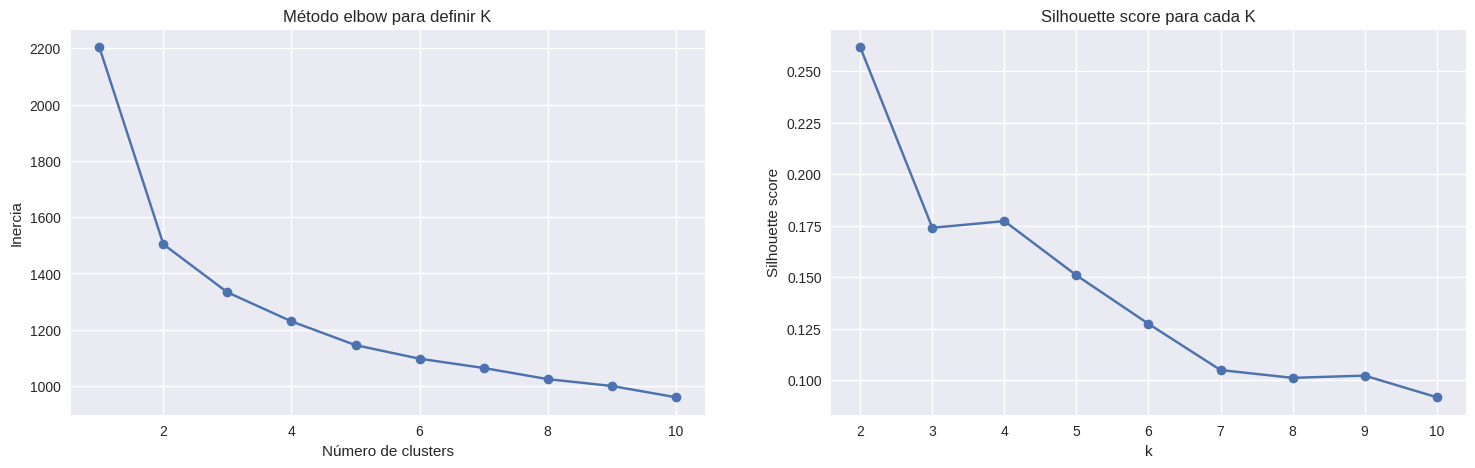

In [ ]:
# Inercia y Silhouette score
inertias_spin = []
silhouette_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_spin_linea_1_scaled)
    inertias_spin.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(df_spin_linea_1_scaled, kmeans.labels_))

# Graficas Elbow y Silhouette score
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertias_spin, marker='o')
plt.title('Método elbow para definir K')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette score para cada K')
plt.xlabel('k')
plt.ylabel('Silhouette score')

plt.show()

#### PCA

Varianza explicada por componente:
 [0.44197279 0.09327236 0.07544092 0.05695066 0.04936508 0.0427597
 0.03518635 0.03258825 0.02580255 0.0237558  0.02046237 0.01872439
 0.01601495 0.01522808 0.01409743 0.01226502 0.01048542 0.00864035
 0.00698753]

Varianza explicada acumulada:
 [0.44197279 0.53524515 0.61068607 0.66763673 0.71700181 0.75976151
 0.79494786 0.82753611 0.85333866 0.87709446 0.89755682 0.91628121
 0.93229617 0.94752425 0.96162168 0.9738867  0.98437212 0.99301247
 1.        ]


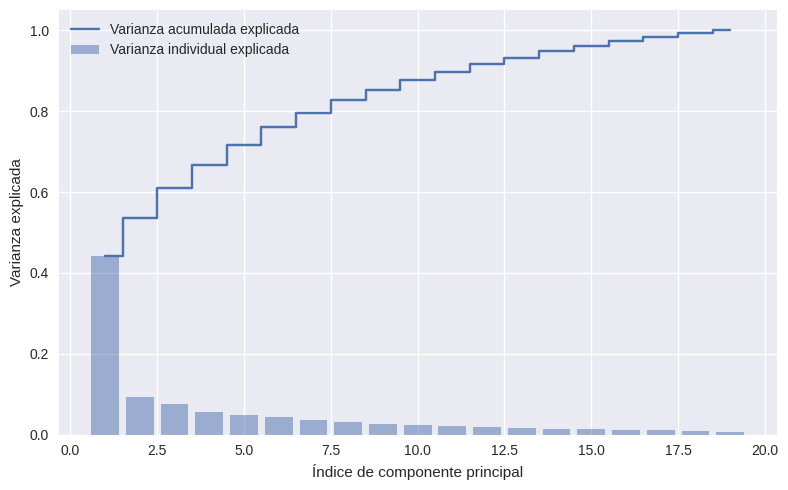

In [ ]:
# PCA
pca_full = PCA()
pca_full.fit(df_spin_linea_1_scaled)

# varianza explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print varianza por componente
print("Varianza explicada por componente:\n", explained_variance_ratio)

# Print varianza acumulada
print("\nVarianza explicada acumulada:\n", cumulative_explained_variance)

# grafica
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Varianza explicada')
plt.xlabel('Índice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

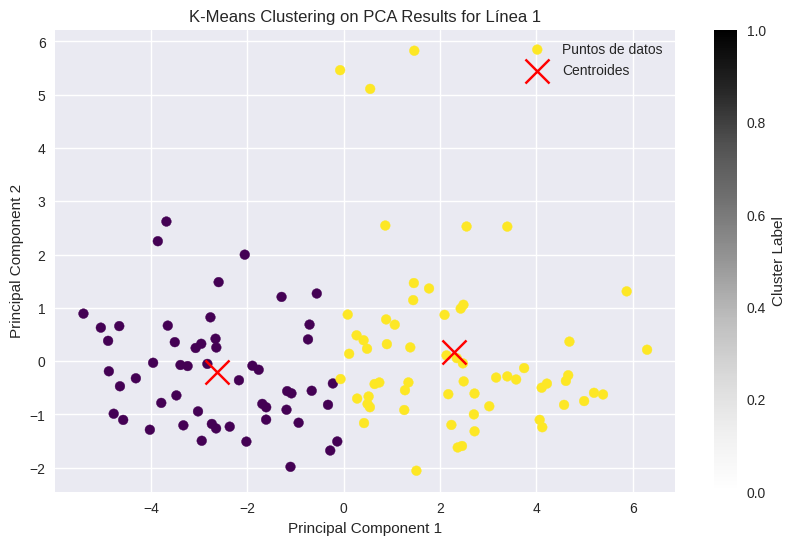

In [ ]:
# Aplicar PCA con 8 componentes
pca_spin_linea_1 = PCA(n_components=8)
spin_linea_1_pca = pca_spin_linea_1.fit_transform(df_spin_linea_1_scaled)

# K means con 2 clusters para linea 1
kmeans_spin_linea_1 = KMeans(n_clusters=2, random_state=42)
clusters_spin_linea_1 = kmeans_spin_linea_1.fit_predict(spin_linea_1_pca)

# Grafica PCA Clusters
plt.figure(figsize=(10, 6))
plt.scatter(spin_linea_1_pca[:, 0], spin_linea_1_pca[:, 1], c=clusters_spin_linea_1, cmap='viridis', marker='o', label='Puntos de datos')
plt.scatter(kmeans_spin_linea_1.cluster_centers_[:, 0], kmeans_spin_linea_1.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.title('K-Means Clustering on PCA Results for Línea 1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

#### Diagrama Silhouette

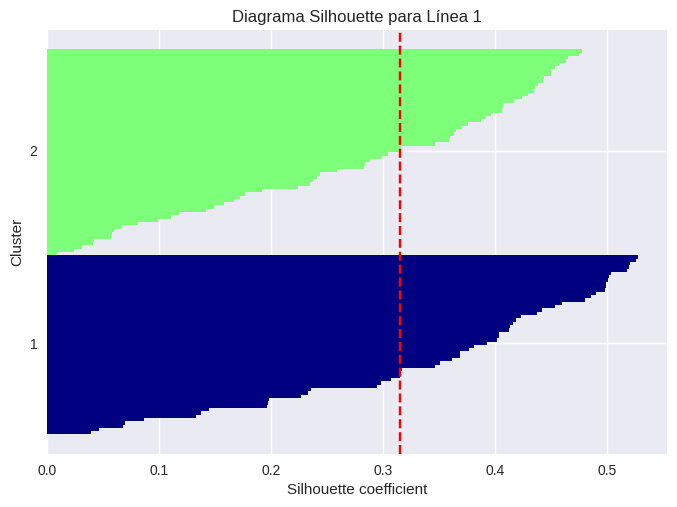

In [ ]:
cluster_labels = np.unique(clusters_spin_linea_1)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(spin_linea_1_pca, clusters_spin_linea_1, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[clusters_spin_linea_1 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.title('Diagrama Silhouette para Línea 1')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show()

#### Linea 2 (preparatoria presencial)

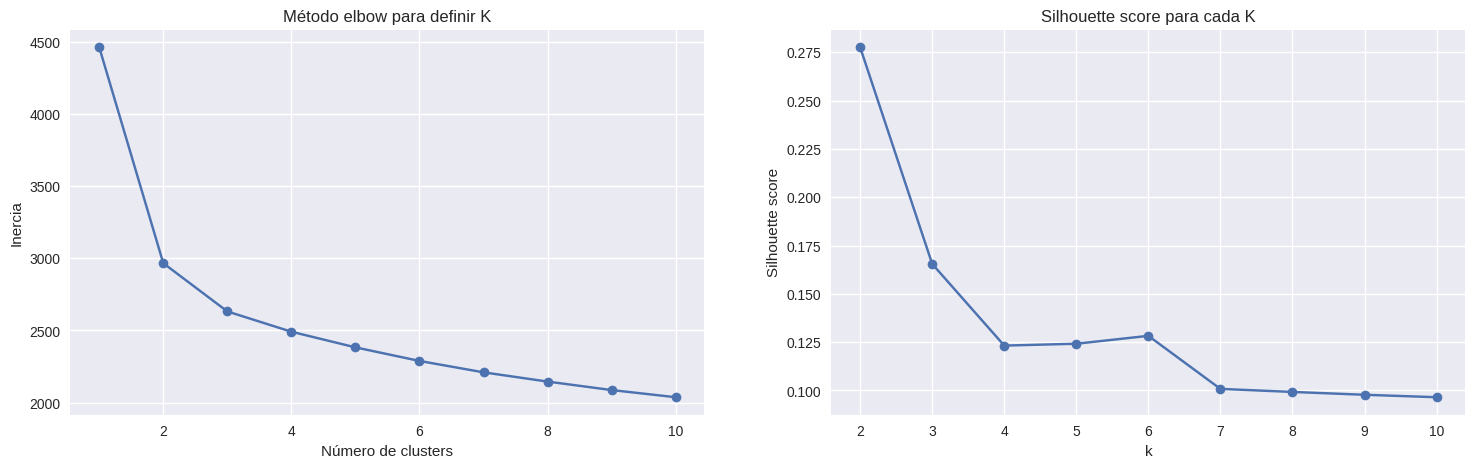

In [ ]:
# Inercia y Silhouette score
inertias_spin = []
silhouette_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_spin_linea_2_scaled)
    inertias_spin.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(df_spin_linea_2_scaled, kmeans.labels_))

# Graficas Elbow y Silhouette score
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertias_spin, marker='o')
plt.title('Método elbow para definir K')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette score para cada K')
plt.xlabel('k')
plt.ylabel('Silhouette score')

plt.show()

#### PCA

Varianza explicada por componente:
 [0.47280824 0.08348499 0.0712026  0.04612078 0.04300073 0.04009433
 0.03364245 0.0287065  0.02640643 0.02479224 0.02308616 0.0205912
 0.01638618 0.01428179 0.01374852 0.01320822 0.01004359 0.00942312
 0.00897193]

Varianza explicada acumulada:
 [0.47280824 0.55629322 0.62749583 0.67361661 0.71661734 0.75671167
 0.79035411 0.81906062 0.84546704 0.87025928 0.89334545 0.91393665
 0.93032283 0.94460462 0.95835314 0.97156136 0.98160495 0.99102807
 1.        ]


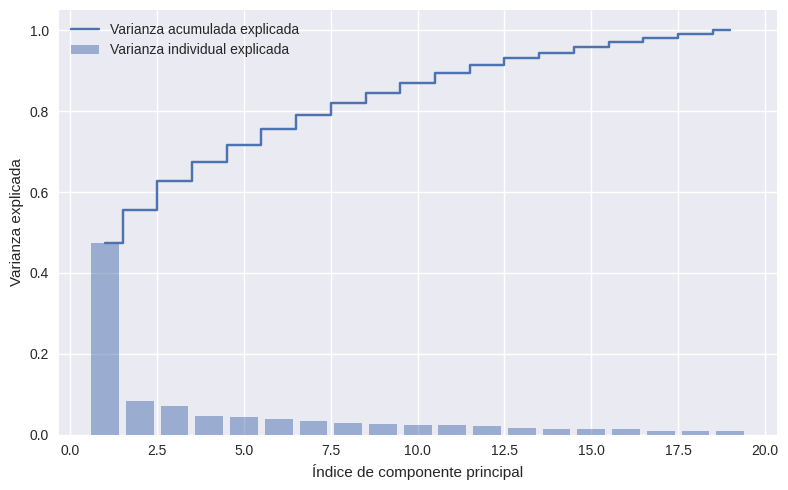

In [ ]:
# PCA
pca_full = PCA()
pca_full.fit(df_spin_linea_2_scaled)

# varianza explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print varianza por componente
print("Varianza explicada por componente:\n", explained_variance_ratio)

# Print varianza acumulada
print("\nVarianza explicada acumulada:\n", cumulative_explained_variance)

# grafica
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Varianza explicada')
plt.xlabel('Índice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

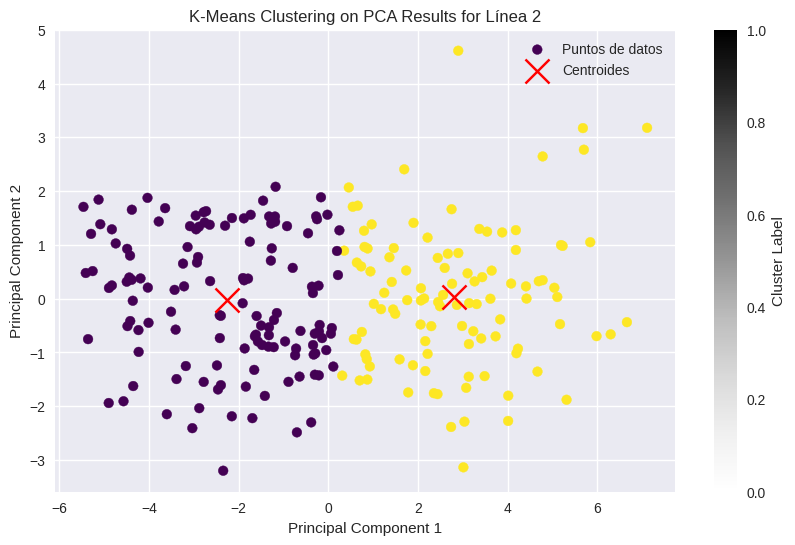

In [ ]:
# Aplicar PCA con 8 componentes
pca_spin_linea_2 = PCA(n_components=8)
spin_linea_2_pca = pca_spin_linea_2.fit_transform(df_spin_linea_2_scaled)

# K means con 2 clusters para linea 1
kmeans_spin_linea_2 = KMeans(n_clusters=2, random_state=42)
clusters_spin_linea_2 = kmeans_spin_linea_2.fit_predict(spin_linea_2_pca)

# Grafica PCA Clusters
plt.figure(figsize=(10, 6))
plt.scatter(spin_linea_2_pca[:, 0], spin_linea_2_pca[:, 1], c=clusters_spin_linea_2, cmap='viridis', marker='o', label='Puntos de datos')
plt.scatter(kmeans_spin_linea_2.cluster_centers_[:, 0], kmeans_spin_linea_2.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.title('K-Means Clustering on PCA Results for Línea 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

#### Diagrama Silhouette

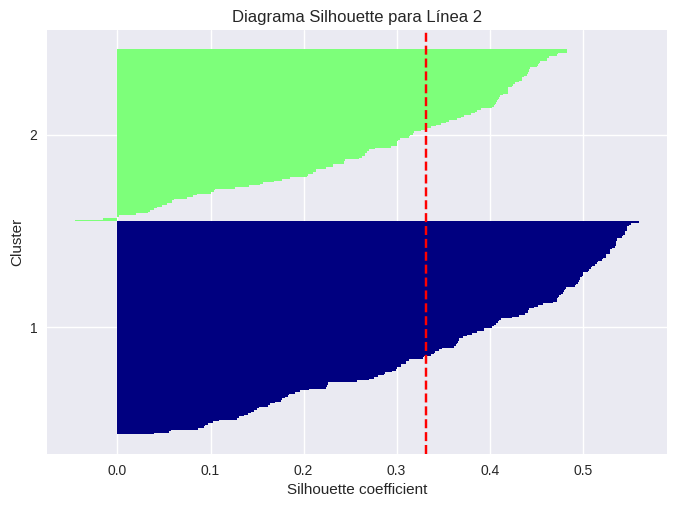

In [ ]:
cluster_labels = np.unique(clusters_spin_linea_2)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(spin_linea_2_pca, clusters_spin_linea_2, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[clusters_spin_linea_2 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.title('Diagrama Silhouette para Línea 2')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show()

#### Análisis de Clusters SPIN

Asignamos Clusters al dataframe original SPIN

In [ ]:
# Linea 1, incluyendo SPIN total
spin_lin1_full = df_spin[df_spin['Línea'] == 1][['Edad', 'Año', 'MA', 'SON', 'ES', 'PD', 'CRI', 'VR', 'TR', 'EF',
                                                 'ECA', 'HD', 'HP', 'EC', 'PC', 'GM', 'MM', 'PA', 'TS', 'TOTAL SPIN']]

# Linea 2, incluyendo SPIN total
spin_lin2_full = df_spin[df_spin['Línea'] == 2][['Edad', 'Año', 'MA', 'SON', 'ES', 'PD', 'CRI', 'VR', 'TR', 'EF',
                                                 'ECA', 'HD', 'HP', 'EC', 'PC', 'GM', 'MM', 'PA', 'TS', 'TOTAL SPIN']]

# Asignar clusters
spin_lin1_full['Cluster'] = clusters_spin_linea_1
spin_lin2_full['Cluster'] = clusters_spin_linea_2

**Comparamos la distribución de puntaje total SPIN para cada cluster**

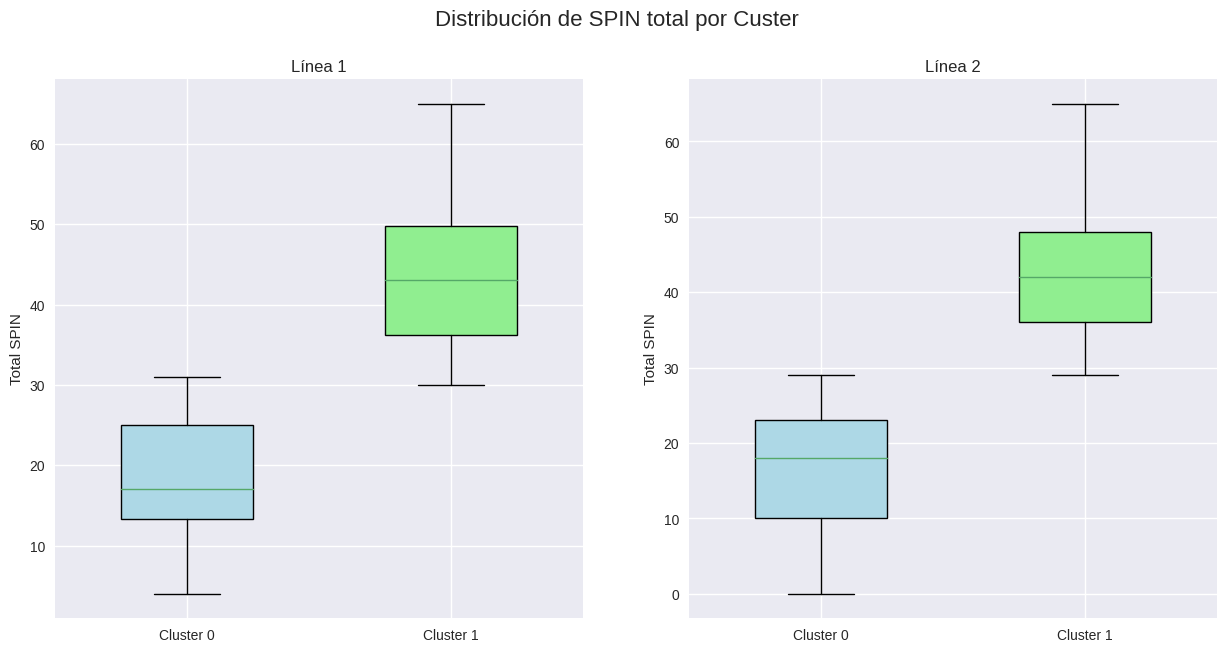

In [ ]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.boxplot([spin_lin1_full[spin_lin1_full['Cluster'] == 0]['TOTAL SPIN']], positions=[0], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.boxplot([spin_lin1_full[spin_lin1_full['Cluster'] == 1]['TOTAL SPIN']], positions=[1], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Línea 1')
plt.ylabel('Total SPIN')
plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])

plt.subplot(1, 2, 2)
plt.boxplot([spin_lin2_full[spin_lin2_full['Cluster'] == 0]['TOTAL SPIN']], positions=[0], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.boxplot([spin_lin2_full[spin_lin2_full['Cluster'] == 1]['TOTAL SPIN']], positions=[1], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Línea 2')
plt.ylabel('Total SPIN')
plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])
plt.suptitle('Distribución de SPIN total por Custer', fontsize=16)

plt.show()

**Observamos el puntaje promedio para cada pregunta del cuestionario SPIN**

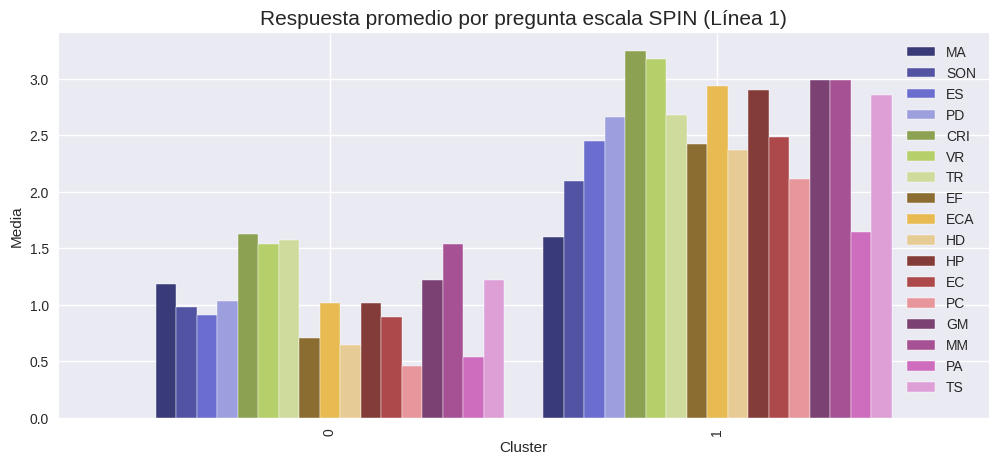

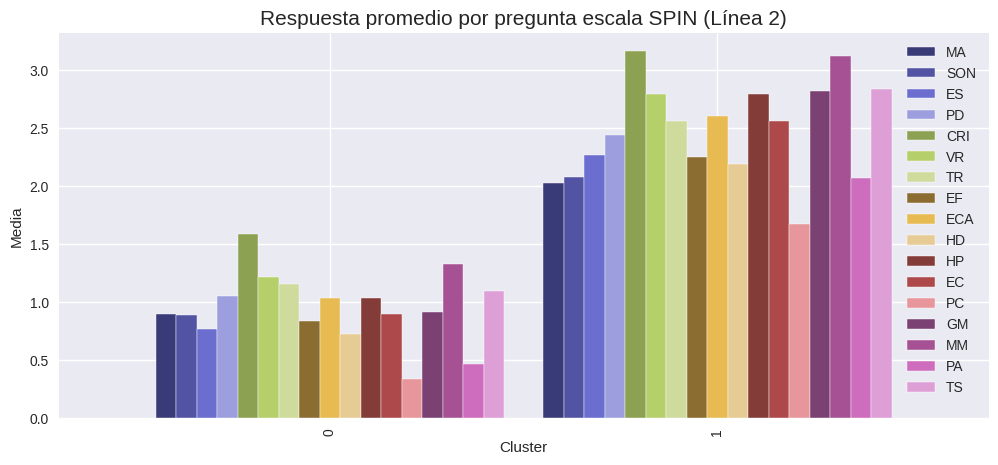

In [ ]:
(spin_lin1_full
 .drop(columns=['Edad', 'Año', 'TOTAL SPIN'])
 .groupby('Cluster')
 .mean()
 .plot(kind='bar', figsize=(12, 5), width=0.9, colormap='tab20b', edgecolor='white')
)
plt.title('Respuesta promedio por pregunta escala SPIN (Línea 1)', fontsize=15)
plt.ylabel('Media')

(spin_lin2_full
 .drop(columns=['Edad', 'Año', 'TOTAL SPIN'])
 .groupby('Cluster')
 .mean()
 .plot(kind='bar', figsize=(12, 5), width=0.9, colormap='tab20b', edgecolor='white')
)
plt.title('Respuesta promedio por pregunta escala SPIN (Línea 2)', fontsize=15)
plt.ylabel('Media')

plt.show()

#### Observaciones escala SPIN

Los clusters generados por el algoritmo K-means muestran una clara separación con respecto a la puntuación total de la escala SPIN.

Por ejemplo, la gráfica boxplot nos muestra en ambos grupos (Línea 1 y Línea 2) que las puntuaciones del "cluster 1" se encuentran dentro del intervalo de "población clínica" para el diagnostico de Fobia Social.

Recordamos los puntos de corte previamente establecidos a considerar:

* Población normal: 12.1 (+/- 9.3)
* Población clínica: 41.1 (+/- 10.2)





### **K-means Escala GAD-7**

In [ ]:
# Segmentación de la escala GAD-7
df_gad= df[['Edad', 'Año', 'Línea', 'NP', 'P', 'PD', 'DR', 'I', 'IR', 'MT',
               'TOTAL GAD-7']]

# Segmentación de clases
# Linea = 1
gad_linea_1 = df_gad[df_gad['Línea'] == 1][['Edad', 'Año', 'NP', 'P', 'PD', 'DR', 'I', 'IR', 'MT']]
# Linea = 2
gad_linea_2 = df_gad[df_gad['Línea'] == 2][['Edad', 'Año', 'NP', 'P', 'PD', 'DR', 'I', 'IR', 'MT']]

In [ ]:
# Estandarización de datos
scaler = StandardScaler()

gad_linea_1_scaled = scaler.fit_transform(gad_linea_1)
df_gad_linea_1_scaled = pd.DataFrame(gad_linea_1_scaled, columns=gad_linea_1.columns)

gad_linea_2_scaled = scaler.fit_transform(gad_linea_2)
df_gad_linea_2_scaled = pd.DataFrame(gad_linea_2_scaled, columns=gad_linea_2.columns)

#### Linea 1 (preparatoria online)

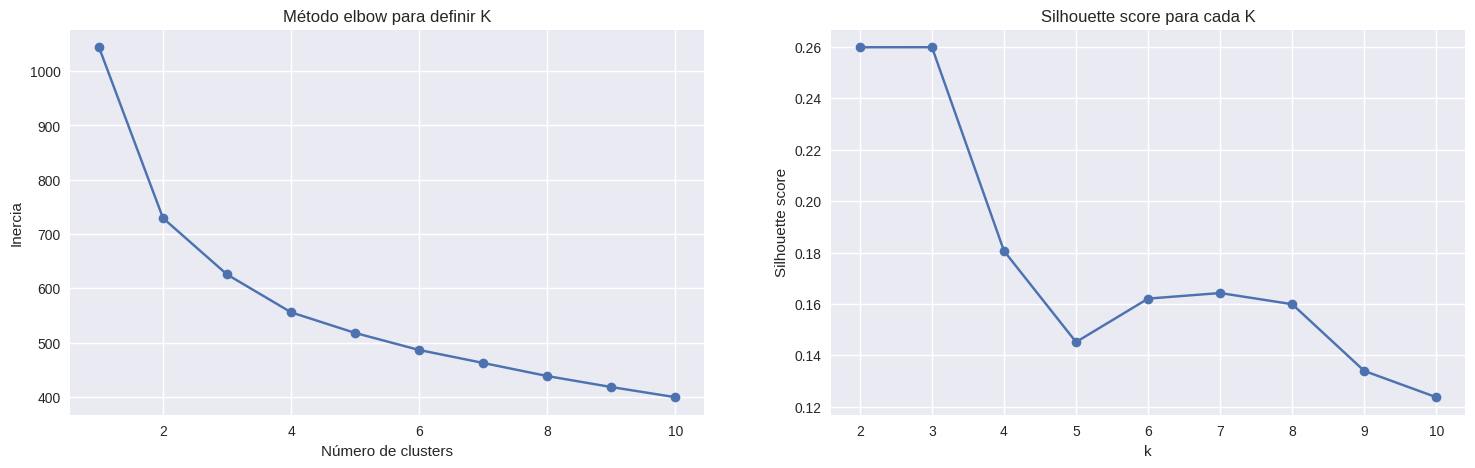

In [ ]:
# Inercia y Silhouette score
inertias_gad = []
silhouette_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_gad_linea_1_scaled)
    inertias_gad.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(df_gad_linea_1_scaled, kmeans.labels_))

# Graficas Elbow y Silhouette score
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertias_gad, marker='o')
plt.title('Método elbow para definir K')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette score para cada K')
plt.xlabel('k')
plt.ylabel('Silhouette score')

plt.show()

#### PCA

Varianza explicada por componente:
 [0.41418705 0.18441282 0.10324465 0.07842633 0.05919568 0.05308623
 0.05032961 0.03433494 0.02278269]

Varianza explicada acumulada:
 [0.41418705 0.59859987 0.70184452 0.78027085 0.83946653 0.89255276
 0.94288237 0.97721731 1.        ]


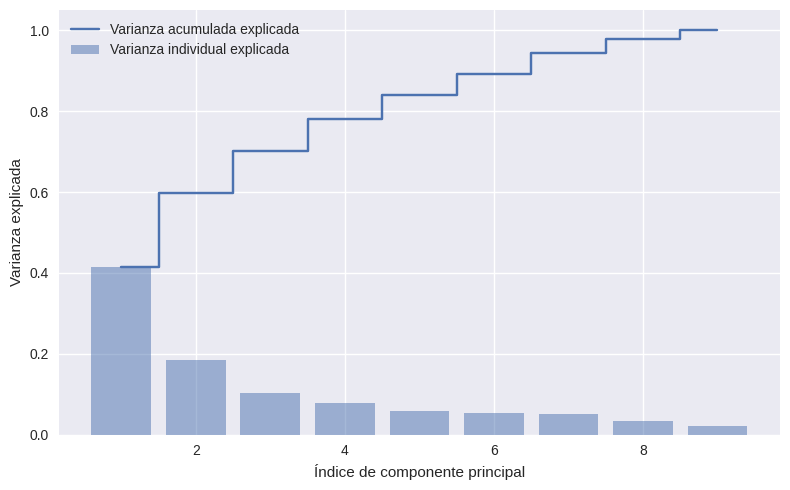

In [ ]:
# PCA
pca_full = PCA()
pca_full.fit(df_gad_linea_1_scaled)

# varianza explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print varianza por componente
print("Varianza explicada por componente:\n", explained_variance_ratio)

# Print varianza acumulada
print("\nVarianza explicada acumulada:\n", cumulative_explained_variance)

# grafica
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Varianza explicada')
plt.xlabel('Índice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

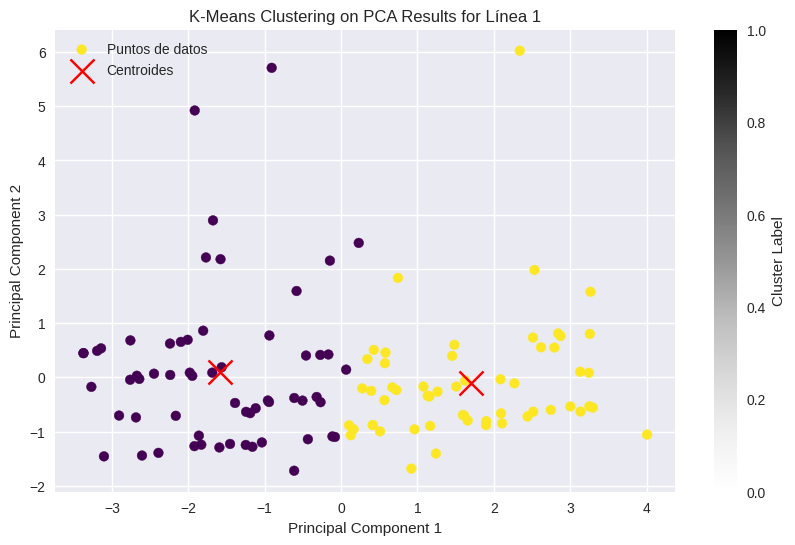

In [ ]:
# Aplicar PCA con 5 componentes
pca_gad_linea_1 = PCA(n_components=5)
gad_linea_1_pca = pca_gad_linea_1.fit_transform(df_gad_linea_1_scaled)

# K means con 3 clusters para linea 1
kmeans_gad_linea_1 = KMeans(n_clusters=2, random_state=42)
clusters_gad_linea_1 = kmeans_gad_linea_1.fit_predict(gad_linea_1_pca)

# Grafica PCA Clusters
plt.figure(figsize=(10, 6))
plt.scatter(gad_linea_1_pca[:, 0], gad_linea_1_pca[:, 1], c=clusters_gad_linea_1, cmap='viridis', marker='o', label='Puntos de datos')
plt.scatter(kmeans_gad_linea_1.cluster_centers_[:, 0], kmeans_gad_linea_1.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.title('K-Means Clustering on PCA Results for Línea 1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

#### Diagrama Silhouette

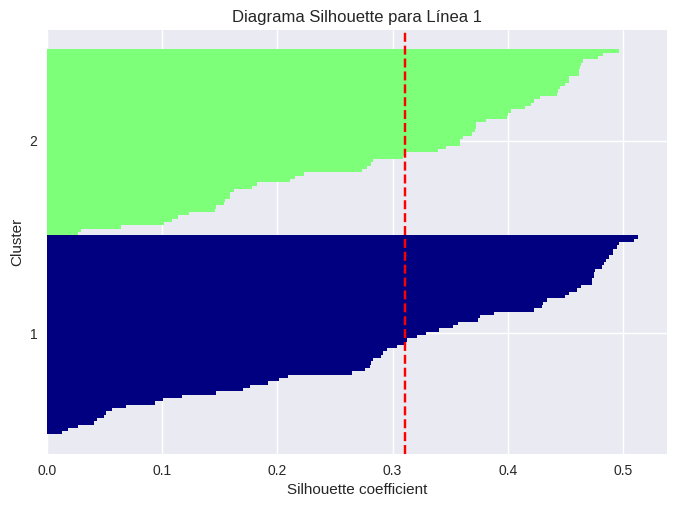

In [ ]:
cluster_labels = np.unique(clusters_gad_linea_1)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(gad_linea_1_pca, clusters_gad_linea_1, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[clusters_gad_linea_1 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.title('Diagrama Silhouette para Línea 1')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show()

#### Linea 2 (preparatoria presencial)

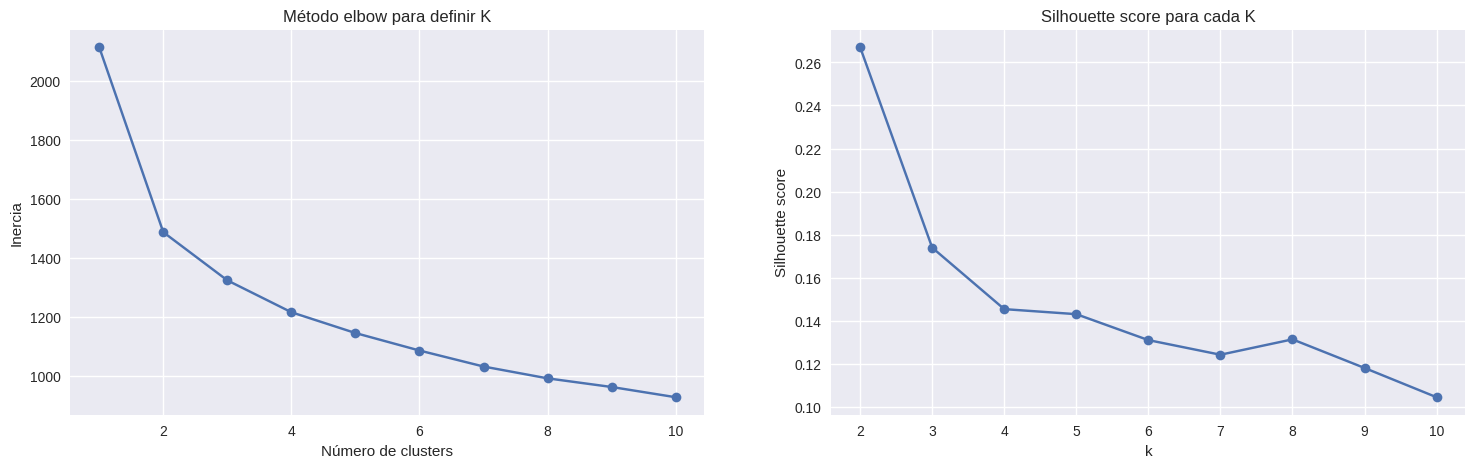

In [ ]:
# Inercia y Silhouette score
inertias_gad = []
silhouette_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_gad_linea_2_scaled)
    inertias_gad.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(df_gad_linea_2_scaled, kmeans.labels_))

# Graficas Elbow y Silhouette score
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertias_gad, marker='o')
plt.title('Método elbow para definir K')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette score para cada K')
plt.xlabel('k')
plt.ylabel('Silhouette score')

plt.show()

#### PCA

Varianza explicada por componente:
 [0.40792581 0.17220664 0.09867803 0.08118753 0.06771868 0.05146612
 0.0479289  0.03869648 0.03419182]

Varianza explicada acumulada:
 [0.40792581 0.58013245 0.67881048 0.75999801 0.82771668 0.8791828
 0.9271117  0.96580818 1.        ]


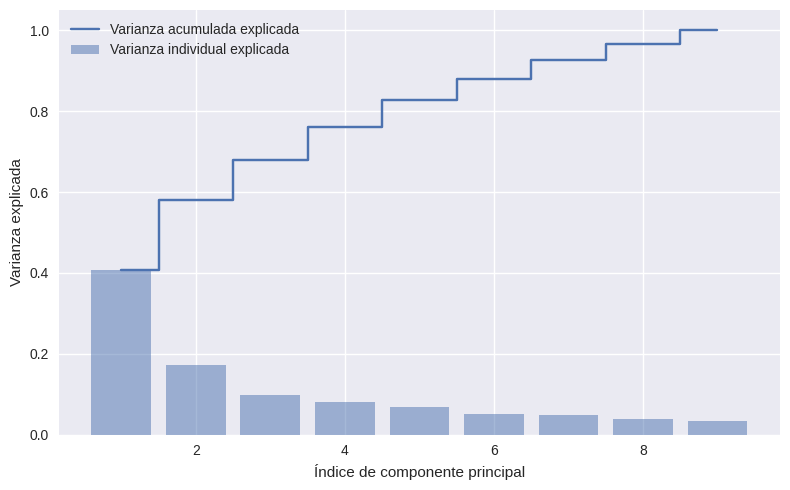

In [ ]:
# PCA
pca_full = PCA()
pca_full.fit(df_gad_linea_2_scaled)

# varianza explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print varianza por componente
print("Varianza explicada por componente:\n", explained_variance_ratio)

# Print varianza acumulada
print("\nVarianza explicada acumulada:\n", cumulative_explained_variance)

# grafica
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Varianza explicada')
plt.xlabel('Índice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

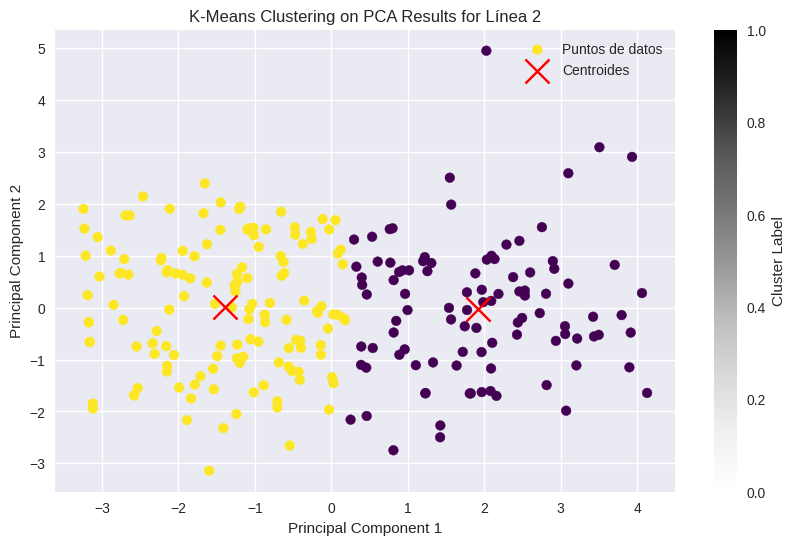

In [ ]:
# Aplicar PCA con 5 componentes
pca_gad_linea_2 = PCA(n_components=5)
gad_linea_2_pca = pca_gad_linea_2.fit_transform(df_gad_linea_2_scaled)

# K means con 2 clusters para linea 2
kmeans_gad_linea_2 = KMeans(n_clusters=2, random_state=42)
clusters_gad_linea_2 = kmeans_gad_linea_2.fit_predict(gad_linea_2_pca)

# Grafica PCA Clusters
plt.figure(figsize=(10, 6))
plt.scatter(gad_linea_2_pca[:, 0], gad_linea_2_pca[:, 1], c=clusters_gad_linea_2, cmap='viridis', marker='o', label='Puntos de datos')
plt.scatter(kmeans_gad_linea_2.cluster_centers_[:, 0], kmeans_gad_linea_2.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.title('K-Means Clustering on PCA Results for Línea 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

#### Diagrama Silhouette

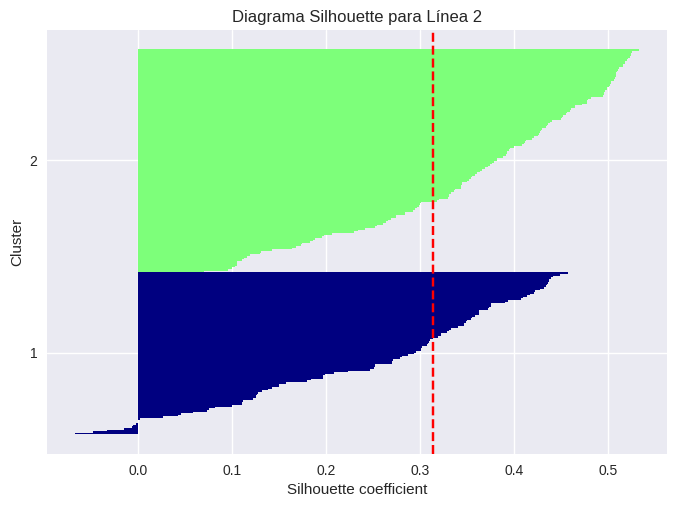

In [ ]:
cluster_labels = np.unique(clusters_gad_linea_2)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(gad_linea_2_pca, clusters_gad_linea_2, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[clusters_gad_linea_2 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.title('Diagrama Silhouette para Línea 2')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show()

#### Análisis de Clusters GAD-7

Asignamos Clusters al dataframe original GAD-7

In [ ]:
# Linea 1, incluyendo GAD-7 total
gad_lin1_full = df_gad[df_gad['Línea'] == 1][['Edad', 'Año', 'Línea', 'NP', 'P', 'PD', 'DR', 'I', 'IR', 'MT', 'TOTAL GAD-7']]

# Linea 2, incluyendo BECK total
gad_lin2_full = df_gad[df_gad['Línea'] == 2][['Edad', 'Año', 'Línea', 'NP', 'P', 'PD', 'DR', 'I', 'IR', 'MT', 'TOTAL GAD-7']]

# Asignar clusters
gad_lin1_full['Cluster'] = clusters_gad_linea_1
gad_lin2_full['Cluster'] = clusters_gad_linea_2

**Comparamos la distribución de puntaje total GAD-7 para cada cluster**

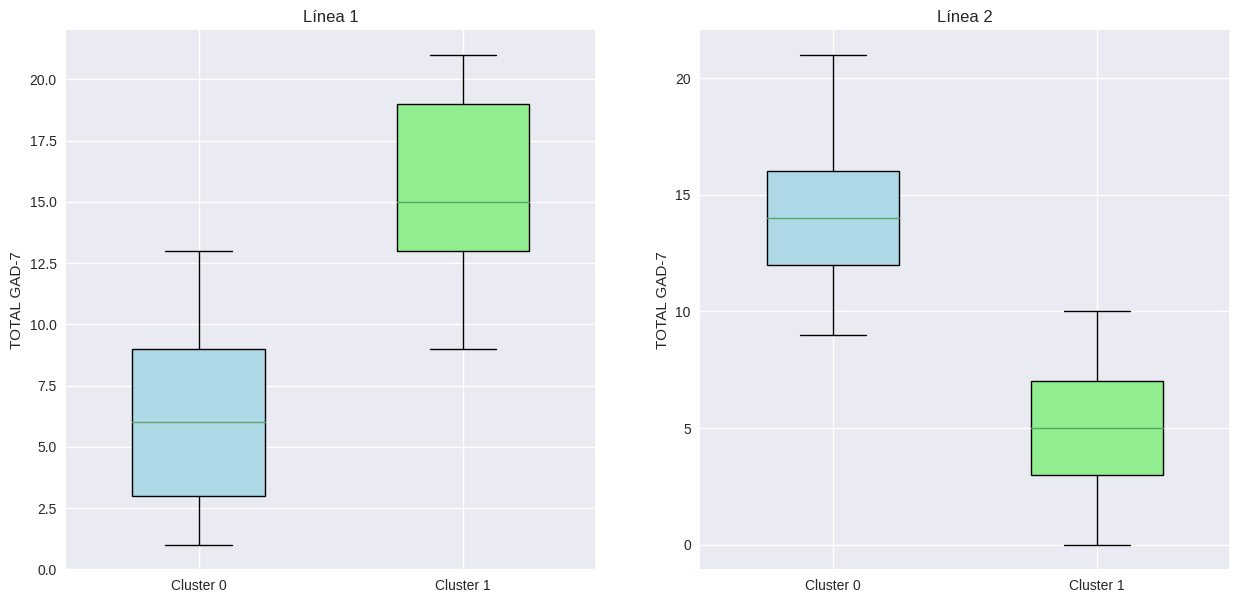

In [ ]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.boxplot([gad_lin1_full[gad_lin1_full['Cluster'] == 0]['TOTAL GAD-7']], positions=[0], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.boxplot([gad_lin1_full[gad_lin1_full['Cluster'] == 1]['TOTAL GAD-7']], positions=[1], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Línea 1')
plt.ylabel('TOTAL GAD-7')
plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])

plt.subplot(1, 2, 2)
plt.boxplot([gad_lin2_full[gad_lin2_full['Cluster'] == 0]['TOTAL GAD-7']], positions=[0], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.boxplot([gad_lin2_full[gad_lin2_full['Cluster'] == 1]['TOTAL GAD-7']], positions=[1], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Línea 2')
plt.ylabel('TOTAL GAD-7')
plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])

plt.show()

**Observamos el puntaje promedio para cada pregunta del cuestionario GAD-7**

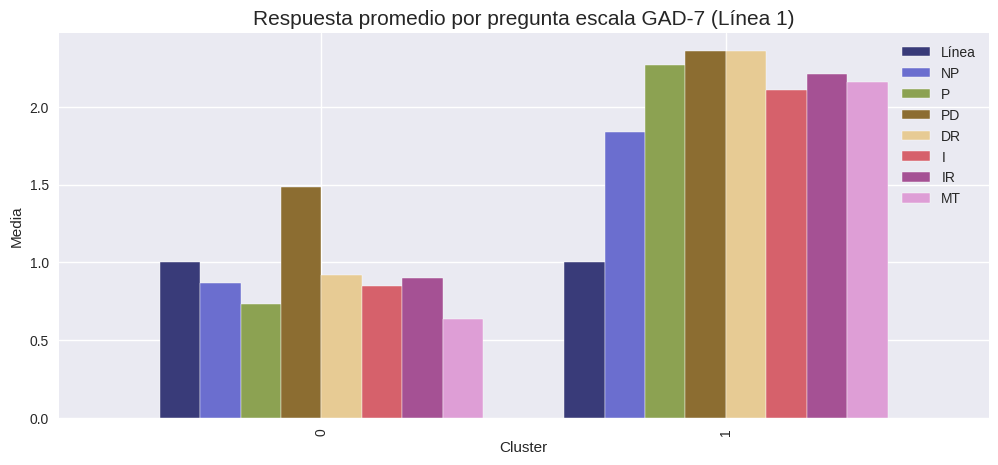

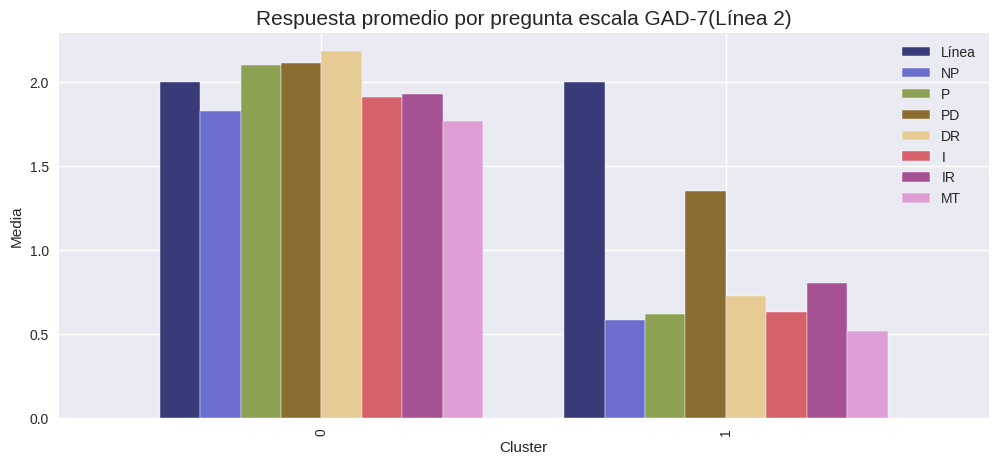

In [ ]:
(gad_lin1_full
 .drop(columns=['Edad', 'Año', 'TOTAL GAD-7'])
 .groupby('Cluster')
 .mean()
 .plot(kind='bar', figsize=(12, 5), width=0.8, colormap='tab20b', edgecolor='white')
)
plt.title('Respuesta promedio por pregunta escala GAD-7 (Línea 1)', fontsize=15)
plt.ylabel('Media')

(gad_lin2_full
 .drop(columns=['Edad', 'Año', 'TOTAL GAD-7'])
 .groupby('Cluster')
 .mean()
 .plot(kind='bar', figsize=(12, 5), width=0.8, colormap='tab20b', edgecolor='white')
)
plt.title('Respuesta promedio por pregunta escala GAD-7(Línea 2)', fontsize=15)
plt.ylabel('Media')

plt.show()

#### Observaciones escala GAD-7

En la escala de Ansiedad Generalizada GAD-7, observamos un ligero traslape en la separación de los clusters con respecto al puntaje total, el cual es mas notorio en el grupo de estudiantes con preparatoria en línea (Línea 1).

Este solapamiento sugiere una mayor variabilidad en los niveles de ansiedad dentro de este grupo específico, lo cual podría ser objeto de un examen más detenido para comprender mejor los factores subyacentes.

### **K-means Escala BECK**

In [ ]:
# Segmentación de la escala BECK
df_beck= df[['Edad', 'Año', 'Línea', 'TPE', 'ACO', 'TBP', 'IDR', 'TMR', 'MR', 'CFA','INT', 'ATZ', 'NRV', 'BLQ', 'TBM',
             'IEI', 'MPC', 'AHG', 'TMM', 'MDO', 'DIG', 'DVS', 'RBF', 'TOTAL BECK']]

# Segmentación de clases
# Linea = 1
beck_linea_1 = df_beck[df_beck['Línea'] == 1][['Edad', 'Año', 'TPE', 'ACO', 'TBP', 'IDR', 'TMR', 'MR', 'CFA','INT', 'ATZ', 'NRV', 'BLQ', 'TBM',
             'IEI', 'MPC', 'AHG', 'TMM', 'MDO', 'DIG', 'DVS', 'RBF']]
# Linea = 2
beck_linea_2 = df_beck[df_beck['Línea'] == 2][['Edad', 'Año', 'TPE', 'ACO', 'TBP', 'IDR', 'TMR', 'MR', 'CFA','INT', 'ATZ', 'NRV', 'BLQ', 'TBM',
             'IEI', 'MPC', 'AHG', 'TMM', 'MDO', 'DIG', 'DVS', 'RBF']]

In [ ]:
# Estandarización de datos
scaler = StandardScaler()

beck_linea_1_scaled = scaler.fit_transform(beck_linea_1)
df_beck_linea_1_scaled = pd.DataFrame(beck_linea_1_scaled, columns=beck_linea_1.columns)

beck_linea_2_scaled = scaler.fit_transform(beck_linea_2)
df_beck_linea_2_scaled = pd.DataFrame(beck_linea_2_scaled, columns=beck_linea_2.columns)

#### Linea 1 (preparatoria online)

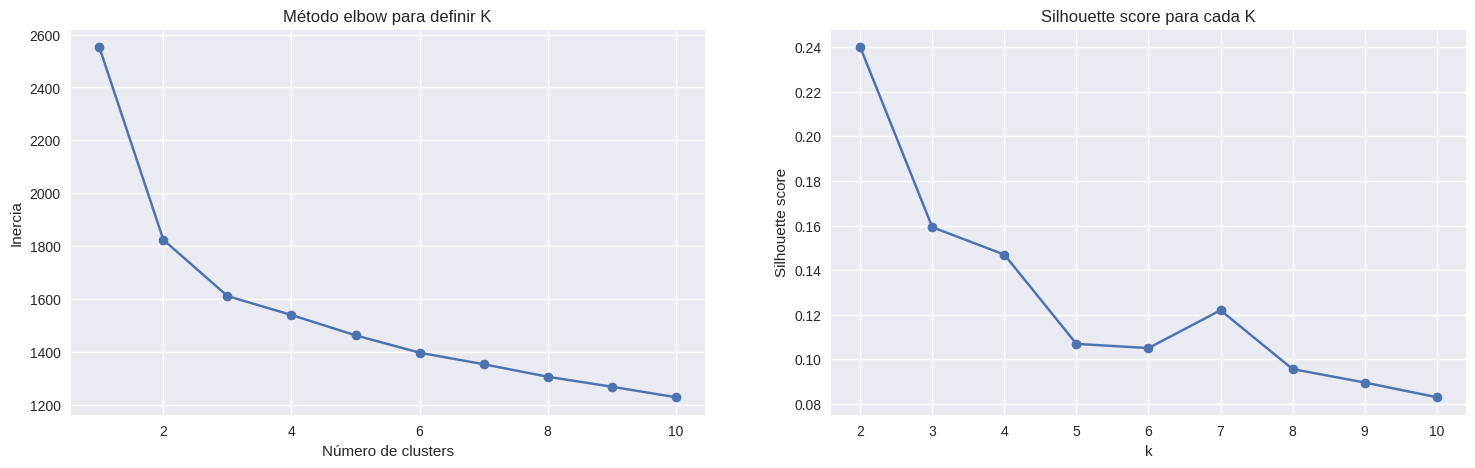

In [ ]:
# Inercia y Silhouette score
inertias_beck = []
silhouette_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_beck_linea_1_scaled)
    inertias_beck.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(df_beck_linea_1_scaled, kmeans.labels_))

# Graficas Elbow y Silhouette score
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertias_beck, marker='o')
plt.title('Método elbow para definir K')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette score para cada K')
plt.xlabel('k')
plt.ylabel('Silhouette score')

plt.show()

#### PCA

Varianza explicada por componente:
 [0.411819   0.07945925 0.05913653 0.0497742  0.04497874 0.03842716
 0.03666045 0.03551491 0.02969588 0.02796366 0.02531016 0.02347449
 0.02140013 0.01967275 0.01615535 0.0155019  0.01336905 0.01271383
 0.01128941 0.01012159 0.00914772 0.00841383]

Varianza explicada acumulada:
 [0.411819   0.49127825 0.55041478 0.60018898 0.64516773 0.68359489
 0.72025534 0.75577025 0.78546613 0.81342979 0.83873995 0.86221444
 0.88361456 0.90328731 0.91944267 0.93494457 0.94831361 0.96102744
 0.97231686 0.98243845 0.99158617 1.        ]


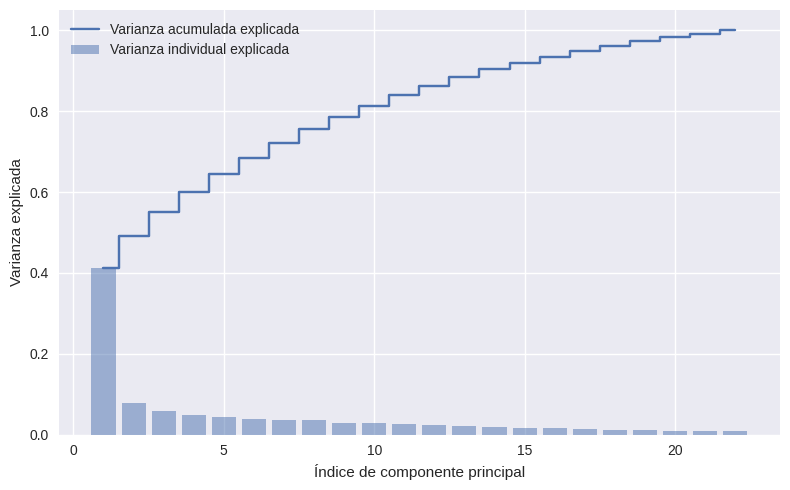

In [ ]:
# PCA
pca_full = PCA()
pca_full.fit(df_beck_linea_1_scaled)

# varianza explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print varianza por componente
print("Varianza explicada por componente:\n", explained_variance_ratio)

# Print varianza acumulada
print("\nVarianza explicada acumulada:\n", cumulative_explained_variance)

# grafica
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Varianza explicada')
plt.xlabel('Índice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

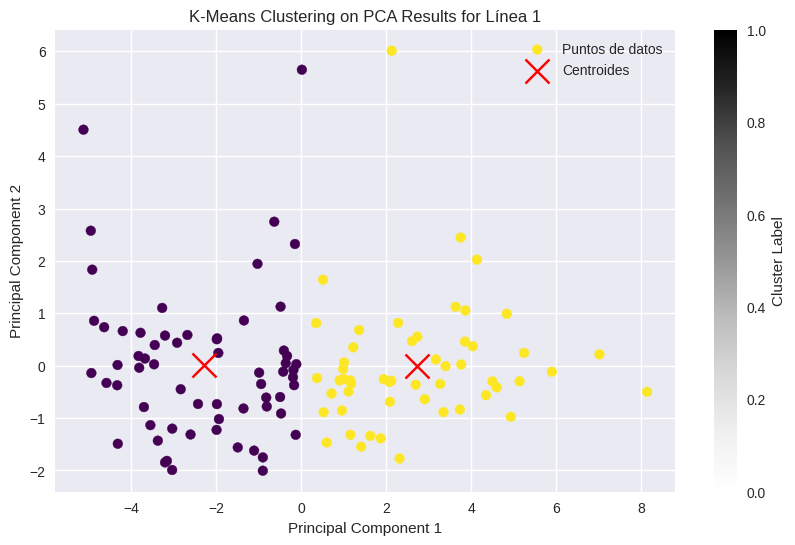

In [ ]:
# Aplicar PCA con 10 componentes
pca_beck_linea_1 = PCA(n_components=10)
beck_linea_1_pca = pca_beck_linea_1.fit_transform(df_beck_linea_1_scaled)

# K means con 2 clusters para linea 1
kmeans_beck_linea_1 = KMeans(n_clusters=2, random_state=42)
clusters_beck_linea_1 = kmeans_beck_linea_1.fit_predict(beck_linea_1_pca)

# Grafica PCA Clusters
plt.figure(figsize=(10, 6))
plt.scatter(beck_linea_1_pca[:, 0], beck_linea_1_pca[:, 1], c=clusters_beck_linea_1, cmap='viridis', marker='o', label='Puntos de datos')
plt.scatter(kmeans_beck_linea_1.cluster_centers_[:, 0], kmeans_beck_linea_1.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.title('K-Means Clustering on PCA Results for Línea 1')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

#### Diagrama Silhouette

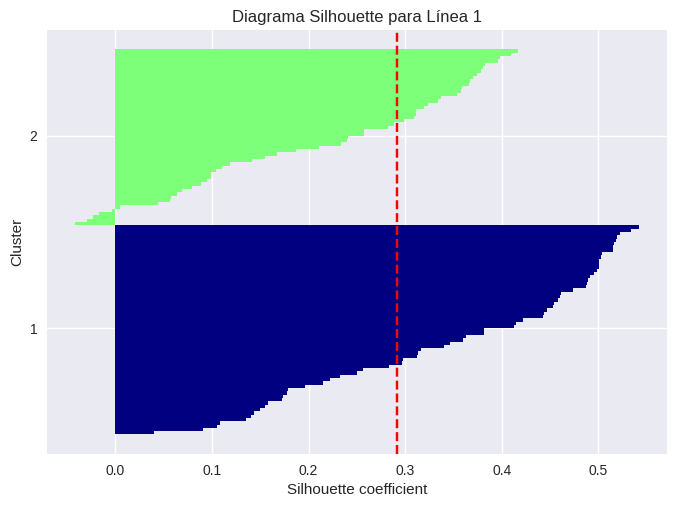

In [ ]:
cluster_labels = np.unique(clusters_beck_linea_1)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(beck_linea_1_pca, clusters_beck_linea_1, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[clusters_beck_linea_1 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.title('Diagrama Silhouette para Línea 1')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show()

#### Linea 2 (preparatoria presencial)

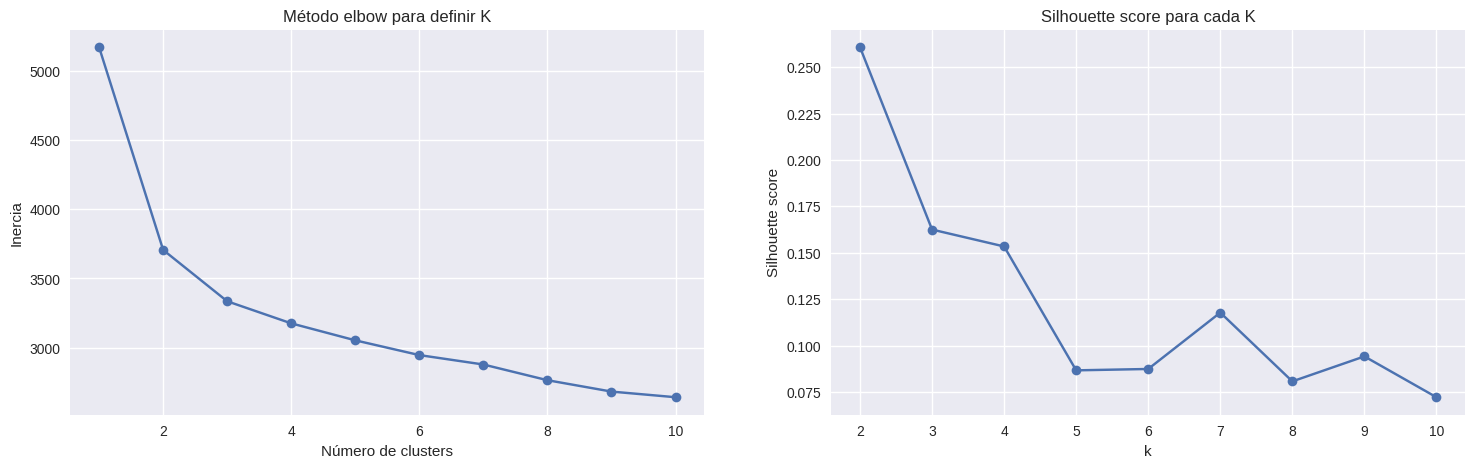

In [ ]:
# Inercia y Silhouette score
inertias_beck = []
silhouette_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_beck_linea_2_scaled)
    inertias_beck.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(df_beck_linea_2_scaled, kmeans.labels_))

# Graficas Elbow y Silhouette score
plt.figure(figsize=(18, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertias_beck, marker='o')
plt.title('Método elbow para definir K')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette score para cada K')
plt.xlabel('k')
plt.ylabel('Silhouette score')

plt.show()

#### PCA

Varianza explicada por componente:
 [0.39350209 0.07551702 0.06217662 0.05043611 0.047626   0.04320467
 0.03496149 0.03123282 0.02893762 0.02854672 0.02653698 0.02390082
 0.02199535 0.02006623 0.01858183 0.01699944 0.01623785 0.01487598
 0.01385578 0.01100633 0.01067792 0.00912433]

Varianza explicada acumulada:
 [0.39350209 0.46901911 0.53119573 0.58163184 0.62925784 0.67246251
 0.707424   0.73865682 0.76759444 0.79614115 0.82267813 0.84657895
 0.8685743  0.88864053 0.90722236 0.92422181 0.94045965 0.95533563
 0.96919142 0.98019775 0.99087567 1.        ]


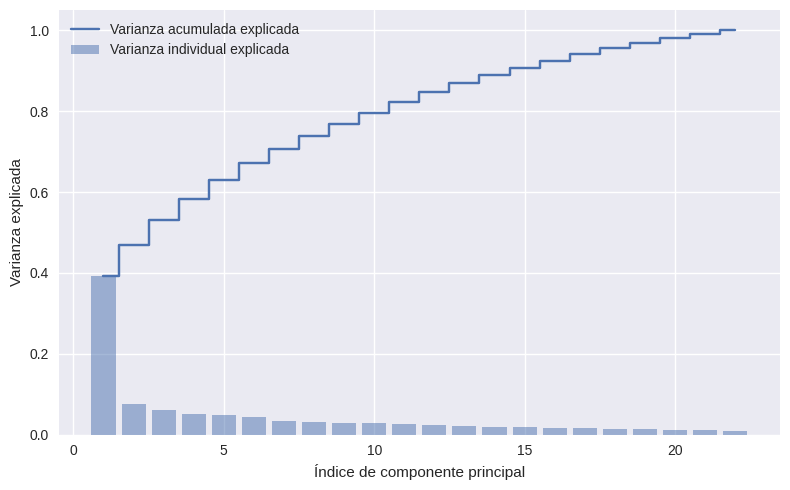

In [ ]:
# PCA
pca_full = PCA()
pca_full.fit(df_beck_linea_2_scaled)

# varianza explicada
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print varianza por componente
print("Varianza explicada por componente:\n", explained_variance_ratio)

# Print varianza acumulada
print("\nVarianza explicada acumulada:\n", cumulative_explained_variance)

# grafica
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Varianza individual explicada')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Varianza acumulada explicada')
plt.ylabel('Varianza explicada')
plt.xlabel('Índice de componente principal')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

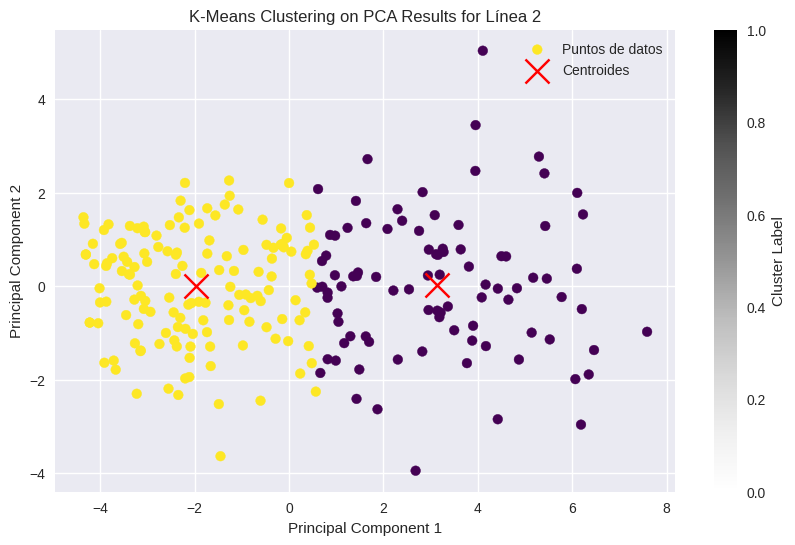

In [ ]:
# Aplicar PCA con 11 componentes
pca_beck_linea_2 = PCA(n_components=11)
beck_linea_2_pca = pca_beck_linea_2.fit_transform(df_beck_linea_2_scaled)

# K means con 2 clusters para linea 2
kmeans_beck_linea_2 = KMeans(n_clusters=2, random_state=42)
clusters_beck_linea_2 = kmeans_beck_linea_2.fit_predict(beck_linea_2_pca)

# Grafica PCA Clusters
plt.figure(figsize=(10, 6))
plt.scatter(beck_linea_2_pca[:, 0], beck_linea_2_pca[:, 1], c=clusters_beck_linea_2, cmap='viridis', marker='o', label='Puntos de datos')
plt.scatter(kmeans_beck_linea_2.cluster_centers_[:, 0], kmeans_beck_linea_2.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroides')
plt.title('K-Means Clustering on PCA Results for Línea 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

#### Diagrama Silhouette

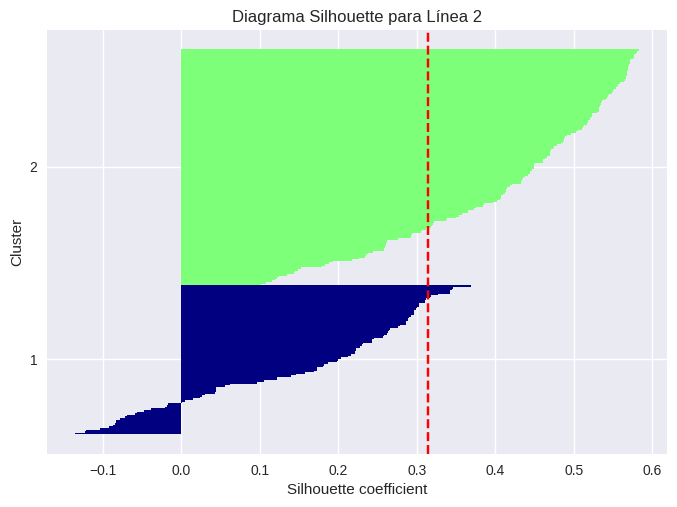

In [ ]:
cluster_labels = np.unique(clusters_beck_linea_2)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(beck_linea_2_pca, clusters_beck_linea_2, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[clusters_beck_linea_2 == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.title('Diagrama Silhouette para Línea 2')
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.show()

#### Análisis de Clusters BECK

Asignamos Clusters al dataframe original BECK

In [ ]:
# Linea 1, incluyendo BECK total
beck_lin1_full = df_beck[df_beck['Línea'] == 1][['Edad', 'Año', 'TPE', 'ACO', 'TBP', 'IDR', 'TMR', 'MR', 'CFA','INT', 'ATZ', 'NRV', 'BLQ', 'TBM',
             'IEI', 'MPC', 'AHG', 'TMM', 'MDO', 'DIG', 'DVS', 'RBF', 'TOTAL BECK']]

# Linea 2, incluyendo BECK total
beck_lin2_full = df_beck[df_beck['Línea'] == 2][['Edad', 'Año', 'TPE', 'ACO', 'TBP', 'IDR', 'TMR', 'MR', 'CFA','INT', 'ATZ', 'NRV', 'BLQ', 'TBM',
             'IEI', 'MPC', 'AHG', 'TMM', 'MDO', 'DIG', 'DVS', 'RBF', 'TOTAL BECK']]

# Asignar clusters
beck_lin1_full['Cluster'] = clusters_beck_linea_1
beck_lin2_full['Cluster'] = clusters_beck_linea_2

**Comparamos la distribución de puntaje total BECK para cada cluster**

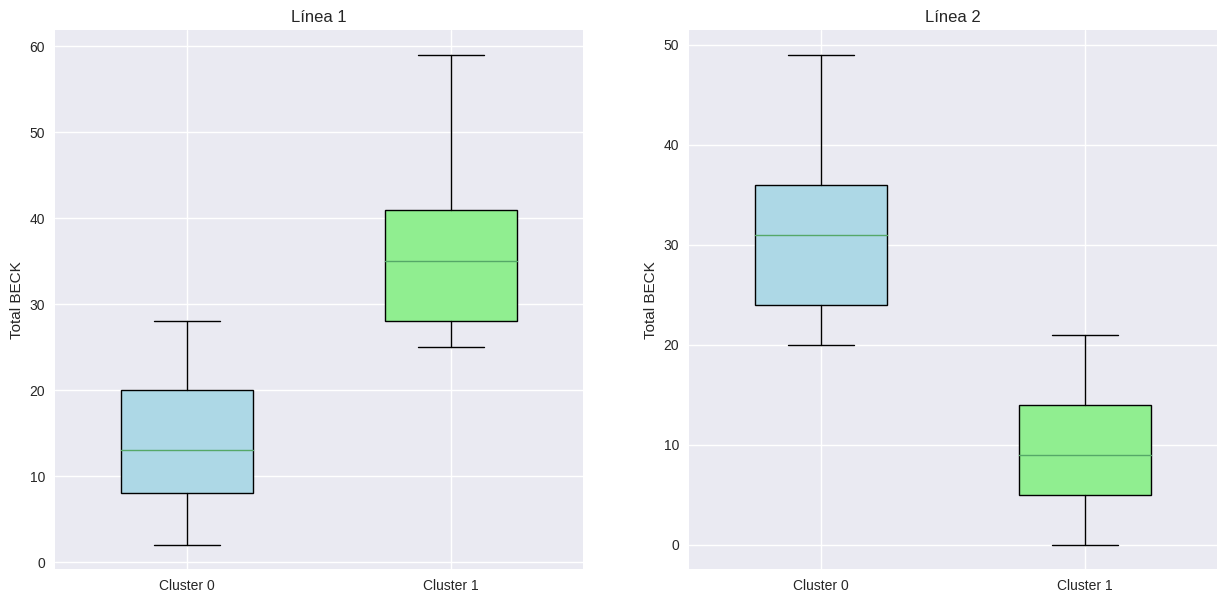

In [ ]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.boxplot([beck_lin1_full[beck_lin1_full['Cluster'] == 0]['TOTAL BECK']], positions=[0], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.boxplot([beck_lin1_full[beck_lin1_full['Cluster'] == 1]['TOTAL BECK']], positions=[1], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Línea 1')
plt.ylabel('Total BECK')
plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])

plt.subplot(1, 2, 2)
plt.boxplot([beck_lin2_full[beck_lin2_full['Cluster'] == 0]['TOTAL BECK']], positions=[0], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.boxplot([beck_lin2_full[beck_lin2_full['Cluster'] == 1]['TOTAL BECK']], positions=[1], widths=0.5,
            patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Línea 2')
plt.ylabel('Total BECK')
plt.xticks([0, 1], ['Cluster 0', 'Cluster 1'])

plt.show()

**Observamos el puntaje promedio para cada pregunta del cuestionario BECK**

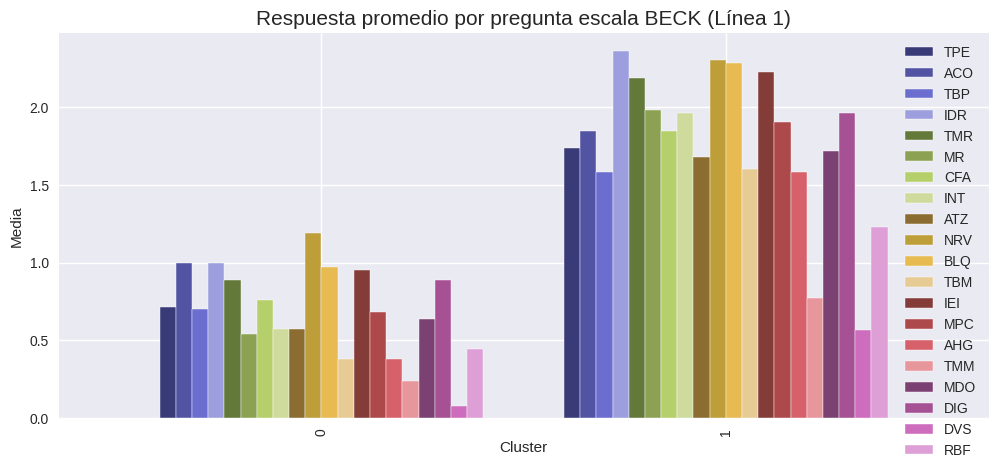

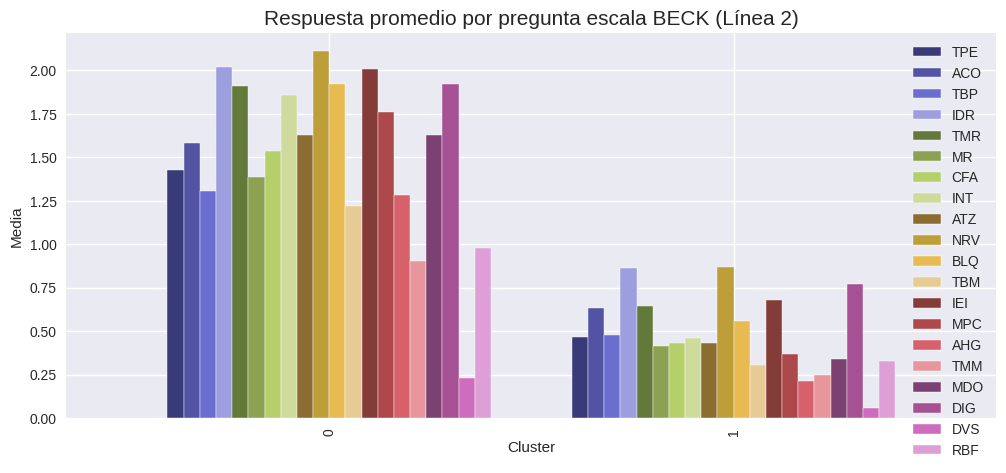

In [ ]:
(beck_lin1_full
 .drop(columns=['Edad', 'Año', 'TOTAL BECK'])
 .groupby('Cluster')
 .mean()
 .plot(kind='bar', figsize=(12, 5), width=0.8, colormap='tab20b', edgecolor='white')
)
plt.title('Respuesta promedio por pregunta escala BECK (Línea 1)', fontsize=15)
plt.ylabel('Media')

(beck_lin2_full
 .drop(columns=['Edad', 'Año', 'TOTAL BECK'])
 .groupby('Cluster')
 .mean()
 .plot(kind='bar', figsize=(12, 5), width=0.8, colormap='tab20b', edgecolor='white')
)
plt.title('Respuesta promedio por pregunta escala BECK (Línea 2)', fontsize=15)
plt.ylabel('Media')

plt.show()

#### Observaciones escala BECK

Se puede observar que, especialmente para el grupo "Línea 2", los clusters generados mediante K-Means no alcanzan la optimización deseada. Esta apreciación se confirma visualmente al examinar el diagrama de Silhouette. Incluso al experimentar con K=3, se obtienen resultados similares. Es importante señalar que una limitación evidente de K-Means se presenta cuando los clusters exhiben tamaños y densidades distintos, lo cual parece ser el caso en nuestra situación.

Como paso siguiente, exploraremos el uso de otros algoritmos de clusterización para abordar las limitaciones identificadas con K-Means.
